In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from matplotlib import figure
import sklearn

In [2]:
wine = pd.read_csv('WINE.csv', index_col='Index')
wine.head()

,Target,Type,Alcohol,Density,Nitrogen,pH,Sugar,A,B,C,D,Di,E,H,S,U,V
Index,,,,,,,,,,,,,,,,,
0,3,white_wine,7.50,1.02,7.51,3.19,10.85,25.1,1.98,10.2,39.6,49.10,1.37,2.36,2.34,6.35,0.29
1,4,white_wine,7.65,1.02,3.41,3.40,1.54,23.9,1.58,4.2,38.5,48.16,0.94,2.42,3.07,7.65,0.05
2,3,red_wine,8.10,1.02,0.25,3.76,2.11,21.7,7.92,0.3,22.0,34.93,1.26,4.84,4.38,4.40,0.22
3,4,white_wine,8.80,1.01,6.35,3.11,3.82,24.3,1.45,4.2,16.5,33.77,1.01,1.49,8.18,3.60,0.10
4,3,red_wine,7.80,1.02,5.34,3.51,3.25,27.3,5.15,4.5,31.9,40.26,1.57,4.15,4.53,6.45,0.14


In [3]:
wine.describe()

,Target,Alcohol,Density,Nitrogen,pH,Sugar,A,B,C,D,Di,E,H,S,U,V
count,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.00000,5567.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5584.000000,5600.000000,5600.000000,5600.000000
mean,3.812143,8.337791,1.039718,5.250179,3.427979,5.59803,24.539752,3.421563,4.776455,32.608714,43.709220,1.366580,2.909697,4.544402,5.516623,0.145773
std,0.864077,0.591844,0.457331,3.698764,0.165377,4.54153,2.573420,2.155710,2.170485,19.532201,20.156748,0.349658,2.121635,2.174807,2.820828,0.094536
min,1.000000,7.100000,1.010000,0.000000,2.910000,0.97000,17.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,7.850000,1.010000,2.740000,3.320000,2.11000,22.900000,1.980000,3.750000,17.600000,28.780000,1.130000,1.800000,3.070000,3.650000,0.070000
50%,4.000000,8.250000,1.020000,4.450000,3.420000,3.25000,24.100000,2.770000,4.650000,30.800000,41.695000,1.360000,2.360000,4.230000,5.650000,0.140000
75%,4.000000,8.750000,1.020000,6.860000,3.530000,8.19000,25.500000,4.220000,5.850000,45.100000,56.120000,1.600000,3.470000,5.550000,7.500000,0.210000
max,6.000000,10.550000,10.210000,30.720000,4.240000,62.91000,41.900000,16.500000,24.900000,316.800000,318.220000,2.600000,37.260000,25.990000,21.700000,0.520000


In [4]:
# Заметны выбросы(больше двух отклонений) в колонках Density, Nitrogen, Sugar, A, B, C, D, Di, H, S, U

In [5]:
d = {'white_wine' : 1, 'red_wine' : 2}
wine = wine.replace({'Type':d})

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 0 to 5599
Data columns (total 17 columns):
Target      5600 non-null int64
Type        5600 non-null int64
Alcohol     5600 non-null float64
Density     5600 non-null float64
Nitrogen    5600 non-null float64
pH          5600 non-null float64
Sugar       5600 non-null float64
A           5567 non-null float64
B           5600 non-null float64
C           5600 non-null float64
D           5600 non-null float64
Di          5600 non-null float64
E           5600 non-null float64
H           5584 non-null float64
S           5600 non-null float64
U           5600 non-null float64
V           5600 non-null float64
dtypes: float64(15), int64(2)
memory usage: 787.5 KB


In [7]:
wine['Density'].value_counts()

1.02     3796
1.01     1783
1.03        6
10.19       3
10.17       2
10.16       2
10.20       2
10.12       1
10.21       1
10.15       1
10.14       1
1.06        1
10.18       1
Name: Density, dtype: int64

In [8]:
wine[wine['Density'] > 1.02]['Target'].value_counts()

4    10
3     7
5     2
2     2
Name: Target, dtype: int64

In [9]:
# Density 10+ явные выбросы, можно дропнуть только их, 
# но видно что у нас только 2 основных значения, так что дропнем все кроме этих двух

In [10]:
drop = wine[wine['Density'] > 1.02].index
drop

Int64Index([  58,  344,  599, 1393, 1670, 1794, 1796, 1829, 2297, 2571, 2720,
            2724, 3099, 3199, 3886, 4144, 4361, 4856, 5016, 5180, 5513],
           dtype='int64', name='Index')

In [11]:
wine.drop(drop, inplace = True)

In [12]:
wine['Density'].value_counts()

1.02    3796
1.01    1783
Name: Density, dtype: int64

In [13]:
wine.isnull().sum()

Target       0
Type         0
Alcohol      0
Density      0
Nitrogen     0
pH           0
Sugar        0
A           33
B            0
C            0
D            0
Di           0
E            0
H           16
S            0
U            0
V            0
dtype: int64

In [14]:
wine = wine.fillna({'A':wine['A'].median(), 'H':wine['H'].median()})

In [17]:
wine.isnull().sum()

Target      0
Type        0
Alcohol     0
Density     0
Nitrogen    0
pH          0
Sugar       0
A           0
B           0
C           0
D           0
Di          0
E           0
H           0
S           0
U           0
V           0
dtype: int64

In [18]:
wine.describe()

,Target,Type,Alcohol,Density,Nitrogen,pH,Sugar,A,B,C,D,Di,E,H,S,U,V
count,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000
mean,3.813049,1.244488,8.338337,1.016804,5.255094,3.428068,5.580075,24.524789,3.416200,4.775426,32.617494,43.719627,1.366852,2.903861,4.539840,5.517851,0.145725
std,0.864213,0.429822,0.592222,0.004664,3.701624,0.165377,4.455963,2.535087,2.151546,2.170953,19.528498,20.157282,0.349782,2.111753,2.174294,2.820410,0.094398
min,1.000000,1.000000,7.100000,1.010000,0.000000,2.910000,0.970000,17.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,7.850000,1.010000,2.745000,3.320000,2.110000,22.900000,1.980000,3.750000,17.600000,28.850000,1.130000,1.800000,3.070000,3.650000,0.070000
50%,4.000000,1.000000,8.250000,1.020000,4.450000,3.420000,3.250000,24.100000,2.770000,4.650000,30.800000,41.700000,1.360000,2.360000,4.230000,5.650000,0.140000
75%,4.000000,1.000000,8.750000,1.020000,6.870000,3.530000,8.190000,25.500000,4.220000,5.850000,45.100000,56.120000,1.600000,3.470000,5.550000,7.500000,0.210000
max,6.000000,2.000000,10.550000,1.020000,30.720000,4.240000,25.150000,41.900000,16.500000,24.900000,316.800000,318.220000,2.600000,37.260000,25.990000,21.700000,0.520000


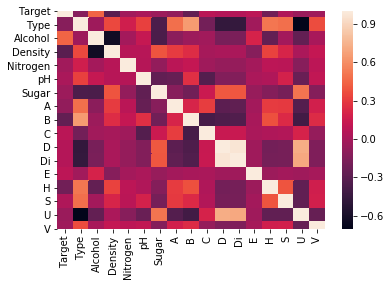

In [21]:
sns.heatmap(wine.corr());

In [22]:
corr = pd.DataFrame(wine.corr())
corr['Target'].sort_values()

Density    -0.303512
B          -0.265617
H          -0.205341
Type       -0.122104
A          -0.082111
U          -0.045584
Sugar      -0.037063
V          -0.023753
Nitrogen   -0.021029
pH          0.014030
S           0.033480
Di          0.052319
D           0.053433
C           0.080253
E           0.088069
Alcohol     0.444276
Target      1.000000
Name: Target, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = wine.drop(['Target'], axis = 1)
y = wine['Target']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

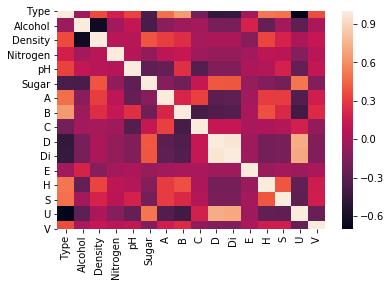

In [26]:
sns.heatmap(X_train.corr())

In [27]:
y_train.head()

Index
2199    4
4088    4
587     3
4910    4
4897    4
Name: Target, dtype: int64

# Random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
clf_rf = RandomForestClassifier()

In [40]:
parametrs = {'criterion':['entropy','gini'],'n_estimators':range(5,51,5),'max_depth':range(3, 20)}

In [41]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv = 5, verbose=20)

In [42]:
grid_search_cv_clf.fit(X_train,y_train)

Fitting 5 folds for each of 340 candidates, totalling 1700 fits
[CV] criterion=entropy, max_depth=3, n_estimators=5 ..................
[CV]  criterion=entropy, max_depth=3, n_estimators=5, score=0.516, total=   0.0s
[CV] criterion=entropy, max_depth=3, n_estimators=5 ..................
[CV]  criterion=entropy, max_depth=3, n_estimators=5, score=0.530, total=   0.0s
[CV] criterion=entropy, max_depth=3, n_estimators=5 ..................
[CV]  criterion=entropy, max_depth=3, n_estimators=5, score=0.526, total=   0.0s
[CV] criterion=entropy, max_depth=3, n_estimators=5 ..................
[CV]  criterion=entropy, max_depth=3, n_estimators=5, score=0.522, total=   0.0s
[CV] criterion=entropy, max_depth=3, n_estimators=5 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=entropy, max_depth=3, n_estimators=5, score=0.541, total=   0.0s
[CV] criterion=entropy, max_depth=3, n_estimators=10 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=10, score=0.518, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=10 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=10, score=0.524, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=10 .................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s


[CV]  criterion=entropy, max_depth=3, n_estimators=10, score=0.523, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=10 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=10, score=0.521, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=10 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=10, score=0.523, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=15 .................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s remaining:    0.0s


[CV]  criterion=entropy, max_depth=3, n_estimators=15, score=0.534, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=15 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=15, score=0.541, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=15 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=15, score=0.539, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=15 .................


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.9s remaining:    0.0s


[CV]  criterion=entropy, max_depth=3, n_estimators=15, score=0.532, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=15 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=15, score=0.526, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=20 .................


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.1s remaining:    0.0s


[CV]  criterion=entropy, max_depth=3, n_estimators=20, score=0.539, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=20 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=20, score=0.538, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=20 .................


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.4s remaining:    0.0s


[CV]  criterion=entropy, max_depth=3, n_estimators=20, score=0.517, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=20 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=20, score=0.527, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=20 .................


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.7s remaining:    0.0s


[CV]  criterion=entropy, max_depth=3, n_estimators=20, score=0.536, total=   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=25 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=25, score=0.536, total=   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=25 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=25, score=0.531, total=   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=25 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=25, score=0.519, total=   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=25 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=25, score=0.532, total=   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=25 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=25, score=0.536, total=   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.538, total=   0.2s


[CV]  criterion=entropy, max_depth=4, n_estimators=25, score=0.544, total=   0.2s
[CV] criterion=entropy, max_depth=4, n_estimators=25 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=25, score=0.536, total=   0.2s
[CV] criterion=entropy, max_depth=4, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=30, score=0.532, total=   0.2s
[CV] criterion=entropy, max_depth=4, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=30, score=0.537, total=   0.2s
[CV] criterion=entropy, max_depth=4, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=30, score=0.532, total=   0.3s
[CV] criterion=entropy, max_depth=4, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=30, score=0.532, total=   0.2s
[CV] criterion=entropy, max_depth=4, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=30, score=0.549, total=   0.2s


[CV]  criterion=entropy, max_depth=5, n_estimators=30, score=0.539, total=   0.3s
[CV] criterion=entropy, max_depth=5, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=5, n_estimators=30, score=0.549, total=   0.3s
[CV] criterion=entropy, max_depth=5, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=5, n_estimators=30, score=0.547, total=   0.3s
[CV] criterion=entropy, max_depth=5, n_estimators=35 .................
[CV]  criterion=entropy, max_depth=5, n_estimators=35, score=0.565, total=   0.3s
[CV] criterion=entropy, max_depth=5, n_estimators=35 .................
[CV]  criterion=entropy, max_depth=5, n_estimators=35, score=0.542, total=   0.3s
[CV] criterion=entropy, max_depth=5, n_estimators=35 .................
[CV]  criterion=entropy, max_depth=5, n_estimators=35, score=0.547, total=   0.3s
[CV] criterion=entropy, max_depth=5, n_estimators=35 .................
[CV]  criterion=entropy, max_depth=5, n_estimators=35, score=0.540, total=   0.3s


[CV]  criterion=entropy, max_depth=6, n_estimators=35, score=0.555, total=   0.5s
[CV] criterion=entropy, max_depth=6, n_estimators=35 .................
[CV]  criterion=entropy, max_depth=6, n_estimators=35, score=0.549, total=   0.4s
[CV] criterion=entropy, max_depth=6, n_estimators=35 .................
[CV]  criterion=entropy, max_depth=6, n_estimators=35, score=0.557, total=   0.4s
[CV] criterion=entropy, max_depth=6, n_estimators=35 .................
[CV]  criterion=entropy, max_depth=6, n_estimators=35, score=0.547, total=   0.4s
[CV] criterion=entropy, max_depth=6, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=6, n_estimators=40, score=0.582, total=   0.6s
[CV] criterion=entropy, max_depth=6, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=6, n_estimators=40, score=0.561, total=   0.5s
[CV] criterion=entropy, max_depth=6, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=6, n_estimators=40, score=0.550, total=   0.5s


[CV]  criterion=entropy, max_depth=7, n_estimators=40, score=0.592, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=7, n_estimators=40, score=0.569, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=7, n_estimators=40, score=0.564, total=   0.8s
[CV] criterion=entropy, max_depth=7, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=7, n_estimators=40, score=0.568, total=   0.7s
[CV] criterion=entropy, max_depth=7, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=7, n_estimators=40, score=0.558, total=   0.6s
[CV] criterion=entropy, max_depth=7, n_estimators=45 .................
[CV]  criterion=entropy, max_depth=7, n_estimators=45, score=0.598, total=   0.7s
[CV] criterion=entropy, max_depth=7, n_estimators=45 .................
[CV]  criterion=entropy, max_depth=7, n_estimators=45, score=0.556, total=   0.6s


[CV]  criterion=entropy, max_depth=8, n_estimators=40, score=0.567, total=   0.7s
[CV] criterion=entropy, max_depth=8, n_estimators=45 .................
[CV]  criterion=entropy, max_depth=8, n_estimators=45, score=0.613, total=   0.7s
[CV] criterion=entropy, max_depth=8, n_estimators=45 .................
[CV]  criterion=entropy, max_depth=8, n_estimators=45, score=0.581, total=   0.7s
[CV] criterion=entropy, max_depth=8, n_estimators=45 .................
[CV]  criterion=entropy, max_depth=8, n_estimators=45, score=0.562, total=   0.7s
[CV] criterion=entropy, max_depth=8, n_estimators=45 .................
[CV]  criterion=entropy, max_depth=8, n_estimators=45, score=0.575, total=   0.8s
[CV] criterion=entropy, max_depth=8, n_estimators=45 .................
[CV]  criterion=entropy, max_depth=8, n_estimators=45, score=0.568, total=   0.8s
[CV] criterion=entropy, max_depth=8, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=8, n_estimators=50, score=0.597, total=   0.9s


[CV]  criterion=entropy, max_depth=9, n_estimators=45, score=0.589, total=   0.8s
[CV] criterion=entropy, max_depth=9, n_estimators=45 .................
[CV]  criterion=entropy, max_depth=9, n_estimators=45, score=0.570, total=   0.8s
[CV] criterion=entropy, max_depth=9, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=9, n_estimators=50, score=0.601, total=   0.9s
[CV] criterion=entropy, max_depth=9, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=9, n_estimators=50, score=0.586, total=   0.8s
[CV] criterion=entropy, max_depth=9, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=9, n_estimators=50, score=0.566, total=   0.8s
[CV] criterion=entropy, max_depth=9, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=9, n_estimators=50, score=0.571, total=   0.8s
[CV] criterion=entropy, max_depth=9, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=9, n_estimators=50, score=0.578, total=   0.8s


[CV]  criterion=entropy, max_depth=10, n_estimators=50, score=0.568, total=   1.0s
[CV] criterion=entropy, max_depth=10, n_estimators=50 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=50, score=0.572, total=   0.9s
[CV] criterion=entropy, max_depth=10, n_estimators=50 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=50, score=0.591, total=   0.9s
[CV] criterion=entropy, max_depth=11, n_estimators=5 .................
[CV]  criterion=entropy, max_depth=11, n_estimators=5, score=0.571, total=   0.1s
[CV] criterion=entropy, max_depth=11, n_estimators=5 .................
[CV]  criterion=entropy, max_depth=11, n_estimators=5, score=0.539, total=   0.1s
[CV] criterion=entropy, max_depth=11, n_estimators=5 .................
[CV]  criterion=entropy, max_depth=11, n_estimators=5, score=0.553, total=   0.1s
[CV] criterion=entropy, max_depth=11, n_estimators=5 .................
[CV]  criterion=entropy, max_depth=11, n_estimators=5, score=0.549, total=   0.

[CV]  criterion=entropy, max_depth=12, n_estimators=5, score=0.542, total=   0.1s
[CV] criterion=entropy, max_depth=12, n_estimators=5 .................
[CV]  criterion=entropy, max_depth=12, n_estimators=5, score=0.561, total=   0.1s
[CV] criterion=entropy, max_depth=12, n_estimators=5 .................
[CV]  criterion=entropy, max_depth=12, n_estimators=5, score=0.538, total=   0.1s
[CV] criterion=entropy, max_depth=12, n_estimators=5 .................
[CV]  criterion=entropy, max_depth=12, n_estimators=5, score=0.526, total=   0.1s
[CV] criterion=entropy, max_depth=12, n_estimators=10 ................
[CV]  criterion=entropy, max_depth=12, n_estimators=10, score=0.601, total=   0.2s
[CV] criterion=entropy, max_depth=12, n_estimators=10 ................
[CV]  criterion=entropy, max_depth=12, n_estimators=10, score=0.595, total=   0.2s
[CV] criterion=entropy, max_depth=12, n_estimators=10 ................
[CV]  criterion=entropy, max_depth=12, n_estimators=10, score=0.550, total=   0.

[CV]  criterion=entropy, max_depth=13, n_estimators=10, score=0.588, total=   0.2s
[CV] criterion=entropy, max_depth=13, n_estimators=10 ................
[CV]  criterion=entropy, max_depth=13, n_estimators=10, score=0.561, total=   0.2s
[CV] criterion=entropy, max_depth=13, n_estimators=10 ................
[CV]  criterion=entropy, max_depth=13, n_estimators=10, score=0.581, total=   0.2s
[CV] criterion=entropy, max_depth=13, n_estimators=10 ................
[CV]  criterion=entropy, max_depth=13, n_estimators=10, score=0.577, total=   0.2s
[CV] criterion=entropy, max_depth=13, n_estimators=10 ................
[CV]  criterion=entropy, max_depth=13, n_estimators=10, score=0.578, total=   0.2s
[CV] criterion=entropy, max_depth=13, n_estimators=15 ................
[CV]  criterion=entropy, max_depth=13, n_estimators=15, score=0.628, total=   0.4s
[CV] criterion=entropy, max_depth=13, n_estimators=15 ................
[CV]  criterion=entropy, max_depth=13, n_estimators=15, score=0.580, total= 

[CV]  criterion=entropy, max_depth=14, n_estimators=10, score=0.589, total=   0.3s
[CV] criterion=entropy, max_depth=14, n_estimators=15 ................
[CV]  criterion=entropy, max_depth=14, n_estimators=15, score=0.600, total=   0.4s
[CV] criterion=entropy, max_depth=14, n_estimators=15 ................
[CV]  criterion=entropy, max_depth=14, n_estimators=15, score=0.621, total=   0.4s
[CV] criterion=entropy, max_depth=14, n_estimators=15 ................
[CV]  criterion=entropy, max_depth=14, n_estimators=15, score=0.567, total=   0.4s
[CV] criterion=entropy, max_depth=14, n_estimators=15 ................
[CV]  criterion=entropy, max_depth=14, n_estimators=15, score=0.589, total=   0.4s
[CV] criterion=entropy, max_depth=14, n_estimators=15 ................
[CV]  criterion=entropy, max_depth=14, n_estimators=15, score=0.583, total=   0.4s
[CV] criterion=entropy, max_depth=14, n_estimators=20 ................
[CV]  criterion=entropy, max_depth=14, n_estimators=20, score=0.617, total= 

[CV]  criterion=entropy, max_depth=15, n_estimators=15, score=0.578, total=   0.4s
[CV] criterion=entropy, max_depth=15, n_estimators=15 ................
[CV]  criterion=entropy, max_depth=15, n_estimators=15, score=0.572, total=   0.4s
[CV] criterion=entropy, max_depth=15, n_estimators=20 ................
[CV]  criterion=entropy, max_depth=15, n_estimators=20, score=0.616, total=   0.5s
[CV] criterion=entropy, max_depth=15, n_estimators=20 ................
[CV]  criterion=entropy, max_depth=15, n_estimators=20, score=0.622, total=   0.5s
[CV] criterion=entropy, max_depth=15, n_estimators=20 ................
[CV]  criterion=entropy, max_depth=15, n_estimators=20, score=0.586, total=   0.5s
[CV] criterion=entropy, max_depth=15, n_estimators=20 ................
[CV]  criterion=entropy, max_depth=15, n_estimators=20, score=0.574, total=   0.5s
[CV] criterion=entropy, max_depth=15, n_estimators=20 ................
[CV]  criterion=entropy, max_depth=15, n_estimators=20, score=0.613, total= 

[CV]  criterion=entropy, max_depth=16, n_estimators=20, score=0.604, total=   0.5s
[CV] criterion=entropy, max_depth=16, n_estimators=20 ................
[CV]  criterion=entropy, max_depth=16, n_estimators=20, score=0.598, total=   0.5s
[CV] criterion=entropy, max_depth=16, n_estimators=20 ................
[CV]  criterion=entropy, max_depth=16, n_estimators=20, score=0.600, total=   0.5s
[CV] criterion=entropy, max_depth=16, n_estimators=25 ................
[CV]  criterion=entropy, max_depth=16, n_estimators=25, score=0.613, total=   0.6s
[CV] criterion=entropy, max_depth=16, n_estimators=25 ................
[CV]  criterion=entropy, max_depth=16, n_estimators=25, score=0.609, total=   0.6s
[CV] criterion=entropy, max_depth=16, n_estimators=25 ................
[CV]  criterion=entropy, max_depth=16, n_estimators=25, score=0.589, total=   0.6s
[CV] criterion=entropy, max_depth=16, n_estimators=25 ................
[CV]  criterion=entropy, max_depth=16, n_estimators=25, score=0.605, total= 

[CV]  criterion=entropy, max_depth=17, n_estimators=25, score=0.623, total=   0.6s
[CV] criterion=entropy, max_depth=17, n_estimators=25 ................
[CV]  criterion=entropy, max_depth=17, n_estimators=25, score=0.607, total=   0.6s
[CV] criterion=entropy, max_depth=17, n_estimators=25 ................
[CV]  criterion=entropy, max_depth=17, n_estimators=25, score=0.600, total=   0.6s
[CV] criterion=entropy, max_depth=17, n_estimators=25 ................
[CV]  criterion=entropy, max_depth=17, n_estimators=25, score=0.602, total=   0.6s
[CV] criterion=entropy, max_depth=17, n_estimators=30 ................
[CV]  criterion=entropy, max_depth=17, n_estimators=30, score=0.636, total=   0.7s
[CV] criterion=entropy, max_depth=17, n_estimators=30 ................
[CV]  criterion=entropy, max_depth=17, n_estimators=30, score=0.617, total=   0.7s
[CV] criterion=entropy, max_depth=17, n_estimators=30 ................
[CV]  criterion=entropy, max_depth=17, n_estimators=30, score=0.593, total= 

[CV]  criterion=entropy, max_depth=18, n_estimators=30, score=0.640, total=   0.7s
[CV] criterion=entropy, max_depth=18, n_estimators=30 ................
[CV]  criterion=entropy, max_depth=18, n_estimators=30, score=0.613, total=   0.7s
[CV] criterion=entropy, max_depth=18, n_estimators=30 ................
[CV]  criterion=entropy, max_depth=18, n_estimators=30, score=0.593, total=   0.7s
[CV] criterion=entropy, max_depth=18, n_estimators=30 ................
[CV]  criterion=entropy, max_depth=18, n_estimators=30, score=0.610, total=   0.7s
[CV] criterion=entropy, max_depth=18, n_estimators=30 ................
[CV]  criterion=entropy, max_depth=18, n_estimators=30, score=0.621, total=   0.7s
[CV] criterion=entropy, max_depth=18, n_estimators=35 ................
[CV]  criterion=entropy, max_depth=18, n_estimators=35, score=0.614, total=   0.8s
[CV] criterion=entropy, max_depth=18, n_estimators=35 ................
[CV]  criterion=entropy, max_depth=18, n_estimators=35, score=0.644, total= 

[CV]  criterion=entropy, max_depth=19, n_estimators=30, score=0.609, total=   0.7s
[CV] criterion=entropy, max_depth=19, n_estimators=35 ................
[CV]  criterion=entropy, max_depth=19, n_estimators=35, score=0.627, total=   0.8s
[CV] criterion=entropy, max_depth=19, n_estimators=35 ................
[CV]  criterion=entropy, max_depth=19, n_estimators=35, score=0.632, total=   0.8s
[CV] criterion=entropy, max_depth=19, n_estimators=35 ................
[CV]  criterion=entropy, max_depth=19, n_estimators=35, score=0.600, total=   0.8s
[CV] criterion=entropy, max_depth=19, n_estimators=35 ................
[CV]  criterion=entropy, max_depth=19, n_estimators=35, score=0.608, total=   0.8s
[CV] criterion=entropy, max_depth=19, n_estimators=35 ................
[CV]  criterion=entropy, max_depth=19, n_estimators=35, score=0.600, total=   0.8s
[CV] criterion=entropy, max_depth=19, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=19, n_estimators=40, score=0.627, total= 

[CV]  criterion=gini, max_depth=3, n_estimators=40, score=0.535, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=40 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=40, score=0.535, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=40 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=40, score=0.530, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=40 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=40, score=0.523, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=40 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=40, score=0.534, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=45 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=45, score=0.533, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=45 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=45, score=0.527, total=   0.2s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=4, n_estimators=45, score=0.554, total=   0.3s
[CV] criterion=gini, max_depth=4, n_estimators=45 ....................
[CV]  criterion=gini, max_depth=4, n_estimators=45, score=0.533, total=   0.3s
[CV] criterion=gini, max_depth=4, n_estimators=45 ....................
[CV]  criterion=gini, max_depth=4, n_estimators=45, score=0.543, total=   0.3s
[CV] criterion=gini, max_depth=4, n_estimators=45 ....................
[CV]  criterion=gini, max_depth=4, n_estimators=45, score=0.538, total=   0.3s
[CV] criterion=gini, max_depth=4, n_estimators=45 ....................
[CV]  criterion=gini, max_depth=4, n_estimators=45, score=0.537, total=   0.3s
[CV] criterion=gini, max_depth=4, n_estimators=50 ....................
[CV]  criterion=gini, max_depth=4, n_estimators=50, score=0.549, total=   0.3s
[CV] criterion=gini, max_depth=4, n_estimators=50 ....................
[CV]  criterion=gini, max_depth=4, n_estimators=50, score=0.542, total=   0.3s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=5, n_estimators=50, score=0.557, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=50 ....................
[CV]  criterion=gini, max_depth=5, n_estimators=50, score=0.538, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=50 ....................
[CV]  criterion=gini, max_depth=5, n_estimators=50, score=0.545, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=50 ....................
[CV]  criterion=gini, max_depth=5, n_estimators=50, score=0.553, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=50 ....................
[CV]  criterion=gini, max_depth=5, n_estimators=50, score=0.536, total=   0.3s
[CV] criterion=gini, max_depth=6, n_estimators=5 .....................
[CV]  criterion=gini, max_depth=6, n_estimators=5, score=0.545, total=   0.0s
[CV] criterion=gini, max_depth=6, n_estimators=5 .....................
[CV]  criterion=gini, max_depth=6, n_estimators=5, score=0.537, total=   0.0s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=7, n_estimators=5, score=0.562, total=   0.1s
[CV] criterion=gini, max_depth=7, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=7, n_estimators=10, score=0.570, total=   0.1s
[CV] criterion=gini, max_depth=7, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=7, n_estimators=10, score=0.553, total=   0.1s
[CV] criterion=gini, max_depth=7, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=7, n_estimators=10, score=0.553, total=   0.1s
[CV] criterion=gini, max_depth=7, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=7, n_estimators=10, score=0.558, total=   0.1s
[CV] criterion=gini, max_depth=7, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=7, n_estimators=10, score=0.547, total=   0.1s
[CV] criterion=gini, max_depth=7, n_estimators=15 ....................
[CV]  criterion=gini, max_depth=7, n_estimators=15, score=0.578, total=   0.1s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=8, n_estimators=15, score=0.578, total=   0.1s
[CV] criterion=gini, max_depth=8, n_estimators=15 ....................
[CV]  criterion=gini, max_depth=8, n_estimators=15, score=0.562, total=   0.1s
[CV] criterion=gini, max_depth=8, n_estimators=15 ....................
[CV]  criterion=gini, max_depth=8, n_estimators=15, score=0.557, total=   0.1s
[CV] criterion=gini, max_depth=8, n_estimators=15 ....................
[CV]  criterion=gini, max_depth=8, n_estimators=15, score=0.569, total=   0.1s
[CV] criterion=gini, max_depth=8, n_estimators=15 ....................
[CV]  criterion=gini, max_depth=8, n_estimators=15, score=0.570, total=   0.1s
[CV] criterion=gini, max_depth=8, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=8, n_estimators=20, score=0.574, total=   0.2s
[CV] criterion=gini, max_depth=8, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=8, n_estimators=20, score=0.570, total=   0.2s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=9, n_estimators=20, score=0.569, total=   0.2s
[CV] criterion=gini, max_depth=9, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=9, n_estimators=20, score=0.575, total=   0.2s
[CV] criterion=gini, max_depth=9, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=9, n_estimators=20, score=0.572, total=   0.2s
[CV] criterion=gini, max_depth=9, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=9, n_estimators=20, score=0.572, total=   0.2s
[CV] criterion=gini, max_depth=9, n_estimators=25 ....................
[CV]  criterion=gini, max_depth=9, n_estimators=25, score=0.605, total=   0.2s
[CV] criterion=gini, max_depth=9, n_estimators=25 ....................
[CV]  criterion=gini, max_depth=9, n_estimators=25, score=0.567, total=   0.2s
[CV] criterion=gini, max_depth=9, n_estimators=25 ....................
[CV]  criterion=gini, max_depth=9, n_estimators=25, score=0.570, total=   0.2s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=10, n_estimators=25, score=0.569, total=   0.2s
[CV] criterion=gini, max_depth=10, n_estimators=25 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=25, score=0.567, total=   0.2s
[CV] criterion=gini, max_depth=10, n_estimators=25 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=25, score=0.581, total=   0.2s
[CV] criterion=gini, max_depth=10, n_estimators=25 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=25, score=0.560, total=   0.2s
[CV] criterion=gini, max_depth=10, n_estimators=30 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=30, score=0.605, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=30 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=30, score=0.579, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=30 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=30, score=0.564, total=   0.3s
[CV] criterion

[CV]  criterion=gini, max_depth=11, n_estimators=30, score=0.579, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=30 ...................
[CV]  criterion=gini, max_depth=11, n_estimators=30, score=0.582, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=30 ...................
[CV]  criterion=gini, max_depth=11, n_estimators=30, score=0.578, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=30 ...................
[CV]  criterion=gini, max_depth=11, n_estimators=30, score=0.583, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=35 ...................
[CV]  criterion=gini, max_depth=11, n_estimators=35, score=0.603, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=35 ...................
[CV]  criterion=gini, max_depth=11, n_estimators=35, score=0.598, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=35 ...................
[CV]  criterion=gini, max_depth=11, n_estimators=35, score=0.573, total=   0.4s
[CV] criterion

[CV]  criterion=gini, max_depth=12, n_estimators=35, score=0.597, total=   0.4s
[CV] criterion=gini, max_depth=12, n_estimators=35 ...................
[CV]  criterion=gini, max_depth=12, n_estimators=35, score=0.597, total=   0.4s
[CV] criterion=gini, max_depth=12, n_estimators=35 ...................
[CV]  criterion=gini, max_depth=12, n_estimators=35, score=0.583, total=   0.4s
[CV] criterion=gini, max_depth=12, n_estimators=35 ...................
[CV]  criterion=gini, max_depth=12, n_estimators=35, score=0.610, total=   0.4s
[CV] criterion=gini, max_depth=12, n_estimators=40 ...................
[CV]  criterion=gini, max_depth=12, n_estimators=40, score=0.621, total=   0.6s
[CV] criterion=gini, max_depth=12, n_estimators=40 ...................
[CV]  criterion=gini, max_depth=12, n_estimators=40, score=0.595, total=   0.6s
[CV] criterion=gini, max_depth=12, n_estimators=40 ...................
[CV]  criterion=gini, max_depth=12, n_estimators=40, score=0.604, total=   0.6s
[CV] criterion

[CV]  criterion=gini, max_depth=13, n_estimators=40, score=0.613, total=   0.5s
[CV] criterion=gini, max_depth=13, n_estimators=40 ...................
[CV]  criterion=gini, max_depth=13, n_estimators=40, score=0.594, total=   0.5s
[CV] criterion=gini, max_depth=13, n_estimators=40 ...................
[CV]  criterion=gini, max_depth=13, n_estimators=40, score=0.598, total=   0.5s
[CV] criterion=gini, max_depth=13, n_estimators=40 ...................
[CV]  criterion=gini, max_depth=13, n_estimators=40, score=0.620, total=   0.5s
[CV] criterion=gini, max_depth=13, n_estimators=45 ...................
[CV]  criterion=gini, max_depth=13, n_estimators=45, score=0.638, total=   0.5s
[CV] criterion=gini, max_depth=13, n_estimators=45 ...................
[CV]  criterion=gini, max_depth=13, n_estimators=45, score=0.619, total=   0.5s
[CV] criterion=gini, max_depth=13, n_estimators=45 ...................
[CV]  criterion=gini, max_depth=13, n_estimators=45, score=0.575, total=   0.5s
[CV] criterion

[CV]  criterion=gini, max_depth=14, n_estimators=45, score=0.618, total=   0.5s
[CV] criterion=gini, max_depth=14, n_estimators=45 ...................
[CV]  criterion=gini, max_depth=14, n_estimators=45, score=0.589, total=   0.6s
[CV] criterion=gini, max_depth=14, n_estimators=45 ...................
[CV]  criterion=gini, max_depth=14, n_estimators=45, score=0.610, total=   0.5s
[CV] criterion=gini, max_depth=14, n_estimators=45 ...................
[CV]  criterion=gini, max_depth=14, n_estimators=45, score=0.589, total=   0.5s
[CV] criterion=gini, max_depth=14, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=14, n_estimators=50, score=0.633, total=   0.6s
[CV] criterion=gini, max_depth=14, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=14, n_estimators=50, score=0.630, total=   0.6s
[CV] criterion=gini, max_depth=14, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=14, n_estimators=50, score=0.600, total=   0.6s
[CV] criterion

[CV]  criterion=gini, max_depth=15, n_estimators=50, score=0.610, total=   0.7s
[CV] criterion=gini, max_depth=15, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=15, n_estimators=50, score=0.597, total=   0.8s
[CV] criterion=gini, max_depth=15, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=15, n_estimators=50, score=0.607, total=   0.7s
[CV] criterion=gini, max_depth=15, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=15, n_estimators=50, score=0.618, total=   0.7s
[CV] criterion=gini, max_depth=16, n_estimators=5 ....................
[CV]  criterion=gini, max_depth=16, n_estimators=5, score=0.572, total=   0.1s
[CV] criterion=gini, max_depth=16, n_estimators=5 ....................
[CV]  criterion=gini, max_depth=16, n_estimators=5, score=0.547, total=   0.1s
[CV] criterion=gini, max_depth=16, n_estimators=5 ....................
[CV]  criterion=gini, max_depth=16, n_estimators=5, score=0.544, total=   0.1s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=17, n_estimators=5, score=0.518, total=   0.1s
[CV] criterion=gini, max_depth=17, n_estimators=5 ....................
[CV]  criterion=gini, max_depth=17, n_estimators=5, score=0.588, total=   0.1s
[CV] criterion=gini, max_depth=17, n_estimators=5 ....................
[CV]  criterion=gini, max_depth=17, n_estimators=5, score=0.546, total=   0.1s
[CV] criterion=gini, max_depth=17, n_estimators=10 ...................
[CV]  criterion=gini, max_depth=17, n_estimators=10, score=0.578, total=   0.2s
[CV] criterion=gini, max_depth=17, n_estimators=10 ...................
[CV]  criterion=gini, max_depth=17, n_estimators=10, score=0.589, total=   0.2s
[CV] criterion=gini, max_depth=17, n_estimators=10 ...................
[CV]  criterion=gini, max_depth=17, n_estimators=10, score=0.545, total=   0.2s
[CV] criterion=gini, max_depth=17, n_estimators=10 ...................
[CV]  criterion=gini, max_depth=17, n_estimators=10, score=0.557, total=   0.2s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=18, n_estimators=10, score=0.591, total=   0.1s
[CV] criterion=gini, max_depth=18, n_estimators=10 ...................
[CV]  criterion=gini, max_depth=18, n_estimators=10, score=0.574, total=   0.1s
[CV] criterion=gini, max_depth=18, n_estimators=10 ...................
[CV]  criterion=gini, max_depth=18, n_estimators=10, score=0.584, total=   0.2s
[CV] criterion=gini, max_depth=18, n_estimators=15 ...................
[CV]  criterion=gini, max_depth=18, n_estimators=15, score=0.602, total=   0.2s
[CV] criterion=gini, max_depth=18, n_estimators=15 ...................
[CV]  criterion=gini, max_depth=18, n_estimators=15, score=0.603, total=   0.2s
[CV] criterion=gini, max_depth=18, n_estimators=15 ...................
[CV]  criterion=gini, max_depth=18, n_estimators=15, score=0.584, total=   0.2s
[CV] criterion=gini, max_depth=18, n_estimators=15 ...................
[CV]  criterion=gini, max_depth=18, n_estimators=15, score=0.576, total=   0.2s
[CV] criterion

[CV]  criterion=gini, max_depth=19, n_estimators=15, score=0.581, total=   0.2s
[CV] criterion=gini, max_depth=19, n_estimators=15 ...................
[CV]  criterion=gini, max_depth=19, n_estimators=15, score=0.601, total=   0.2s
[CV] criterion=gini, max_depth=19, n_estimators=20 ...................
[CV]  criterion=gini, max_depth=19, n_estimators=20, score=0.626, total=   0.3s
[CV] criterion=gini, max_depth=19, n_estimators=20 ...................
[CV]  criterion=gini, max_depth=19, n_estimators=20, score=0.611, total=   0.2s
[CV] criterion=gini, max_depth=19, n_estimators=20 ...................
[CV]  criterion=gini, max_depth=19, n_estimators=20, score=0.589, total=   0.3s
[CV] criterion=gini, max_depth=19, n_estimators=20 ...................
[CV]  criterion=gini, max_depth=19, n_estimators=20, score=0.606, total=   0.2s
[CV] criterion=gini, max_depth=19, n_estimators=20 ...................
[CV]  criterion=gini, max_depth=19, n_estimators=20, score=0.608, total=   0.3s
[CV] criterion

[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed: 11.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [46]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 17, 'n_estimators': 40}

In [125]:
best_clf.score(X_test,y_test)

0.6229390681003584

In [47]:
best_clf = grid_search_cv_clf.best_estimator_

In [48]:
 feature_importances = best_clf.feature_importances_

In [49]:
feature_importances_df = pd.DataFrame({'features':list(X_train),
                                       'feature_importances':feature_importances})

In [50]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
1,Alcohol,0.123613
7,B,0.089629
12,H,0.078824
14,U,0.073070
13,S,0.069885
10,Di,0.069271
5,Sugar,0.065446
9,D,0.065214
4,pH,0.064993
8,C,0.064353


In [126]:
#Дропнем фичи с feature importance c значениями примерно до 0.05
X1 = wine.drop(['Target','Type','Density','V', 'E', 'Nitrogen','A','Di','pH'], axis = 1)
y1 = wine['Target']

In [53]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=42)

In [127]:
X_test1.head()

,Alcohol,Sugar,B,C,D,H,S,U
Index,,,,,,,,
2643,7.85,1.35,2.77,8.55,15.40,3.16,2.77,5.70
1554,7.35,12.37,1.32,6.90,44.00,2.05,7.88,6.85
727,8.65,1.44,2.51,7.35,35.20,1.74,4.67,7.50
2800,7.75,16.03,1.98,8.40,56.65,3.35,4.23,13.80
470,7.90,2.49,5.54,7.35,4.40,4.96,3.21,0.40


# Новый RF clf на дропнутых фичах

In [57]:
test_clf_rf = RandomForestClassifier(criterion='entropy',n_estimators=40, max_depth=17)

In [61]:
parametrs1 = {'min_samples_split':range(2,10),'min_samples_leaf':range(1,20)}

In [62]:
grid_search_cv_clf1 = GridSearchCV(test_clf_rf, parametrs1, cv = 5, verbose=20)

In [63]:
grid_search_cv_clf1.fit(X_train1,y_train1)

Fitting 5 folds for each of 152 candidates, totalling 760 fits
[CV] min_samples_leaf=1, min_samples_split=2 .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_leaf=1, min_samples_split=2, score=0.650, total=   0.6s
[CV] min_samples_leaf=1, min_samples_split=2 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=2, score=0.668, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=2 .........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=2, score=0.615, total=   0.6s
[CV] min_samples_leaf=1, min_samples_split=2 .........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=2, score=0.628, total=   0.6s
[CV] min_samples_leaf=1, min_samples_split=2 .........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=2, score=0.664, total=   0.6s
[CV] min_samples_leaf=1, min_samples_split=3 .........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=3, score=0.671, total=   0.6s
[CV] min_samples_leaf=1, min_samples_split=3 .........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.4s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=3, score=0.638, total=   0.6s
[CV] min_samples_leaf=1, min_samples_split=3 .........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.9s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=3, score=0.634, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=3 .........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.5s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=3, score=0.622, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=3 .........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.0s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=3, score=0.643, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=4 .........................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.5s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=4, score=0.658, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=4 .........................


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    6.0s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=4, score=0.641, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=4 .........................


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    6.6s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=4, score=0.615, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=4 .........................


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    7.1s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=4, score=0.638, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=4 .........................


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    7.6s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=4, score=0.649, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=5 .........................


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    8.1s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=5, score=0.669, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=5 .........................


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    8.7s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=5, score=0.629, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=5 .........................


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    9.2s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=5, score=0.624, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=5 .........................


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    9.7s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=5, score=0.628, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=5 .........................


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   10.2s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=5, score=0.626, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=6 .........................
[CV]  min_samples_leaf=1, min_samples_split=6, score=0.653, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=6 .........................
[CV]  min_samples_leaf=1, min_samples_split=6, score=0.643, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=6 .........................
[CV]  min_samples_leaf=1, min_samples_split=6, score=0.624, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=6 .........................
[CV]  min_samples_leaf=1, min_samples_split=6, score=0.629, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=6 .........................
[CV]  min_samples_leaf=1, min_samples_split=6, score=0.638, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=7 .........................
[CV]  min_samples_leaf=1, min_samples_split=7, score=0.638, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=7 ...........

[CV]  min_samples_leaf=2, min_samples_split=9, score=0.631, total=   0.5s
[CV] min_samples_leaf=2, min_samples_split=9 .........................
[CV]  min_samples_leaf=2, min_samples_split=9, score=0.606, total=   0.5s
[CV] min_samples_leaf=2, min_samples_split=9 .........................
[CV]  min_samples_leaf=2, min_samples_split=9, score=0.612, total=   0.5s
[CV] min_samples_leaf=2, min_samples_split=9 .........................
[CV]  min_samples_leaf=2, min_samples_split=9, score=0.619, total=   0.5s
[CV] min_samples_leaf=3, min_samples_split=2 .........................
[CV]  min_samples_leaf=3, min_samples_split=2, score=0.633, total=   0.5s
[CV] min_samples_leaf=3, min_samples_split=2 .........................
[CV]  min_samples_leaf=3, min_samples_split=2, score=0.617, total=   0.5s
[CV] min_samples_leaf=3, min_samples_split=2 .........................
[CV]  min_samples_leaf=3, min_samples_split=2, score=0.631, total=   0.5s
[CV] min_samples_leaf=3, min_samples_split=2 ...........

[CV]  min_samples_leaf=4, min_samples_split=4, score=0.595, total=   0.5s
[CV] min_samples_leaf=4, min_samples_split=4 .........................
[CV]  min_samples_leaf=4, min_samples_split=4, score=0.631, total=   0.5s
[CV] min_samples_leaf=4, min_samples_split=5 .........................
[CV]  min_samples_leaf=4, min_samples_split=5, score=0.627, total=   0.5s
[CV] min_samples_leaf=4, min_samples_split=5 .........................
[CV]  min_samples_leaf=4, min_samples_split=5, score=0.610, total=   0.5s
[CV] min_samples_leaf=4, min_samples_split=5 .........................
[CV]  min_samples_leaf=4, min_samples_split=5, score=0.599, total=   0.5s
[CV] min_samples_leaf=4, min_samples_split=5 .........................
[CV]  min_samples_leaf=4, min_samples_split=5, score=0.592, total=   0.6s
[CV] min_samples_leaf=4, min_samples_split=5 .........................
[CV]  min_samples_leaf=4, min_samples_split=5, score=0.627, total=   0.5s
[CV] min_samples_leaf=4, min_samples_split=6 ...........

[CV]  min_samples_leaf=5, min_samples_split=8, score=0.636, total=   0.4s
[CV] min_samples_leaf=5, min_samples_split=8 .........................
[CV]  min_samples_leaf=5, min_samples_split=8, score=0.611, total=   0.4s
[CV] min_samples_leaf=5, min_samples_split=8 .........................
[CV]  min_samples_leaf=5, min_samples_split=8, score=0.604, total=   0.4s
[CV] min_samples_leaf=5, min_samples_split=8 .........................
[CV]  min_samples_leaf=5, min_samples_split=8, score=0.599, total=   0.4s
[CV] min_samples_leaf=5, min_samples_split=8 .........................
[CV]  min_samples_leaf=5, min_samples_split=8, score=0.607, total=   0.5s
[CV] min_samples_leaf=5, min_samples_split=9 .........................
[CV]  min_samples_leaf=5, min_samples_split=9, score=0.620, total=   0.6s
[CV] min_samples_leaf=5, min_samples_split=9 .........................
[CV]  min_samples_leaf=5, min_samples_split=9, score=0.612, total=   0.5s
[CV] min_samples_leaf=5, min_samples_split=9 ...........

[CV]  min_samples_leaf=7, min_samples_split=3, score=0.591, total=   0.5s
[CV] min_samples_leaf=7, min_samples_split=3 .........................
[CV]  min_samples_leaf=7, min_samples_split=3, score=0.571, total=   0.7s
[CV] min_samples_leaf=7, min_samples_split=3 .........................
[CV]  min_samples_leaf=7, min_samples_split=3, score=0.602, total=   0.6s
[CV] min_samples_leaf=7, min_samples_split=4 .........................
[CV]  min_samples_leaf=7, min_samples_split=4, score=0.603, total=   0.4s
[CV] min_samples_leaf=7, min_samples_split=4 .........................
[CV]  min_samples_leaf=7, min_samples_split=4, score=0.601, total=   0.6s
[CV] min_samples_leaf=7, min_samples_split=4 .........................
[CV]  min_samples_leaf=7, min_samples_split=4, score=0.587, total=   0.5s
[CV] min_samples_leaf=7, min_samples_split=4 .........................
[CV]  min_samples_leaf=7, min_samples_split=4, score=0.593, total=   0.4s
[CV] min_samples_leaf=7, min_samples_split=4 ...........

[CV]  min_samples_leaf=8, min_samples_split=6, score=0.598, total=   0.4s
[CV] min_samples_leaf=8, min_samples_split=7 .........................
[CV]  min_samples_leaf=8, min_samples_split=7, score=0.607, total=   0.4s
[CV] min_samples_leaf=8, min_samples_split=7 .........................
[CV]  min_samples_leaf=8, min_samples_split=7, score=0.593, total=   0.5s
[CV] min_samples_leaf=8, min_samples_split=7 .........................
[CV]  min_samples_leaf=8, min_samples_split=7, score=0.580, total=   0.4s
[CV] min_samples_leaf=8, min_samples_split=7 .........................
[CV]  min_samples_leaf=8, min_samples_split=7, score=0.569, total=   0.4s
[CV] min_samples_leaf=8, min_samples_split=7 .........................
[CV]  min_samples_leaf=8, min_samples_split=7, score=0.594, total=   0.4s
[CV] min_samples_leaf=8, min_samples_split=8 .........................
[CV]  min_samples_leaf=8, min_samples_split=8, score=0.609, total=   0.4s
[CV] min_samples_leaf=8, min_samples_split=8 ...........

[CV]  min_samples_leaf=10, min_samples_split=2, score=0.569, total=   0.4s
[CV] min_samples_leaf=10, min_samples_split=2 ........................
[CV]  min_samples_leaf=10, min_samples_split=2, score=0.578, total=   0.4s
[CV] min_samples_leaf=10, min_samples_split=2 ........................
[CV]  min_samples_leaf=10, min_samples_split=2, score=0.575, total=   0.4s
[CV] min_samples_leaf=10, min_samples_split=2 ........................
[CV]  min_samples_leaf=10, min_samples_split=2, score=0.578, total=   0.4s
[CV] min_samples_leaf=10, min_samples_split=3 ........................
[CV]  min_samples_leaf=10, min_samples_split=3, score=0.582, total=   0.4s
[CV] min_samples_leaf=10, min_samples_split=3 ........................
[CV]  min_samples_leaf=10, min_samples_split=3, score=0.576, total=   0.4s
[CV] min_samples_leaf=10, min_samples_split=3 ........................
[CV]  min_samples_leaf=10, min_samples_split=3, score=0.586, total=   0.4s
[CV] min_samples_leaf=10, min_samples_split=3 ...

[CV]  min_samples_leaf=11, min_samples_split=5, score=0.571, total=   0.4s
[CV] min_samples_leaf=11, min_samples_split=5 ........................
[CV]  min_samples_leaf=11, min_samples_split=5, score=0.578, total=   0.4s
[CV] min_samples_leaf=11, min_samples_split=6 ........................
[CV]  min_samples_leaf=11, min_samples_split=6, score=0.595, total=   0.4s
[CV] min_samples_leaf=11, min_samples_split=6 ........................
[CV]  min_samples_leaf=11, min_samples_split=6, score=0.595, total=   0.4s
[CV] min_samples_leaf=11, min_samples_split=6 ........................
[CV]  min_samples_leaf=11, min_samples_split=6, score=0.563, total=   0.4s
[CV] min_samples_leaf=11, min_samples_split=6 ........................
[CV]  min_samples_leaf=11, min_samples_split=6, score=0.587, total=   0.4s
[CV] min_samples_leaf=11, min_samples_split=6 ........................
[CV]  min_samples_leaf=11, min_samples_split=6, score=0.589, total=   0.4s
[CV] min_samples_leaf=11, min_samples_split=7 ...

[CV]  min_samples_leaf=12, min_samples_split=9, score=0.582, total=   0.4s
[CV] min_samples_leaf=12, min_samples_split=9 ........................
[CV]  min_samples_leaf=12, min_samples_split=9, score=0.578, total=   0.4s
[CV] min_samples_leaf=12, min_samples_split=9 ........................
[CV]  min_samples_leaf=12, min_samples_split=9, score=0.568, total=   0.4s
[CV] min_samples_leaf=12, min_samples_split=9 ........................
[CV]  min_samples_leaf=12, min_samples_split=9, score=0.575, total=   0.4s
[CV] min_samples_leaf=12, min_samples_split=9 ........................
[CV]  min_samples_leaf=12, min_samples_split=9, score=0.582, total=   0.4s
[CV] min_samples_leaf=13, min_samples_split=2 ........................
[CV]  min_samples_leaf=13, min_samples_split=2, score=0.595, total=   0.4s
[CV] min_samples_leaf=13, min_samples_split=2 ........................
[CV]  min_samples_leaf=13, min_samples_split=2, score=0.580, total=   0.4s
[CV] min_samples_leaf=13, min_samples_split=2 ...

[CV]  min_samples_leaf=14, min_samples_split=4, score=0.560, total=   0.5s
[CV] min_samples_leaf=14, min_samples_split=4 ........................
[CV]  min_samples_leaf=14, min_samples_split=4, score=0.578, total=   0.3s
[CV] min_samples_leaf=14, min_samples_split=4 ........................
[CV]  min_samples_leaf=14, min_samples_split=4, score=0.582, total=   0.4s
[CV] min_samples_leaf=14, min_samples_split=5 ........................
[CV]  min_samples_leaf=14, min_samples_split=5, score=0.596, total=   0.3s
[CV] min_samples_leaf=14, min_samples_split=5 ........................
[CV]  min_samples_leaf=14, min_samples_split=5, score=0.578, total=   0.3s
[CV] min_samples_leaf=14, min_samples_split=5 ........................
[CV]  min_samples_leaf=14, min_samples_split=5, score=0.562, total=   0.3s
[CV] min_samples_leaf=14, min_samples_split=5 ........................
[CV]  min_samples_leaf=14, min_samples_split=5, score=0.577, total=   0.3s
[CV] min_samples_leaf=14, min_samples_split=5 ...

[CV]  min_samples_leaf=15, min_samples_split=7, score=0.585, total=   0.3s
[CV] min_samples_leaf=15, min_samples_split=8 ........................
[CV]  min_samples_leaf=15, min_samples_split=8, score=0.582, total=   0.4s
[CV] min_samples_leaf=15, min_samples_split=8 ........................
[CV]  min_samples_leaf=15, min_samples_split=8, score=0.568, total=   0.4s
[CV] min_samples_leaf=15, min_samples_split=8 ........................
[CV]  min_samples_leaf=15, min_samples_split=8, score=0.557, total=   0.4s
[CV] min_samples_leaf=15, min_samples_split=8 ........................
[CV]  min_samples_leaf=15, min_samples_split=8, score=0.562, total=   0.3s
[CV] min_samples_leaf=15, min_samples_split=8 ........................
[CV]  min_samples_leaf=15, min_samples_split=8, score=0.571, total=   0.4s
[CV] min_samples_leaf=15, min_samples_split=9 ........................
[CV]  min_samples_leaf=15, min_samples_split=9, score=0.600, total=   0.4s
[CV] min_samples_leaf=15, min_samples_split=9 ...

[CV]  min_samples_leaf=17, min_samples_split=3, score=0.570, total=   0.3s
[CV] min_samples_leaf=17, min_samples_split=3 ........................
[CV]  min_samples_leaf=17, min_samples_split=3, score=0.557, total=   0.3s
[CV] min_samples_leaf=17, min_samples_split=3 ........................
[CV]  min_samples_leaf=17, min_samples_split=3, score=0.562, total=   0.3s
[CV] min_samples_leaf=17, min_samples_split=3 ........................
[CV]  min_samples_leaf=17, min_samples_split=3, score=0.561, total=   0.4s
[CV] min_samples_leaf=17, min_samples_split=4 ........................
[CV]  min_samples_leaf=17, min_samples_split=4, score=0.569, total=   0.4s
[CV] min_samples_leaf=17, min_samples_split=4 ........................
[CV]  min_samples_leaf=17, min_samples_split=4, score=0.567, total=   0.3s
[CV] min_samples_leaf=17, min_samples_split=4 ........................
[CV]  min_samples_leaf=17, min_samples_split=4, score=0.563, total=   0.3s
[CV] min_samples_leaf=17, min_samples_split=4 ...

[CV]  min_samples_leaf=18, min_samples_split=6, score=0.565, total=   0.3s
[CV] min_samples_leaf=18, min_samples_split=6 ........................
[CV]  min_samples_leaf=18, min_samples_split=6, score=0.578, total=   0.3s
[CV] min_samples_leaf=18, min_samples_split=7 ........................
[CV]  min_samples_leaf=18, min_samples_split=7, score=0.586, total=   0.5s
[CV] min_samples_leaf=18, min_samples_split=7 ........................
[CV]  min_samples_leaf=18, min_samples_split=7, score=0.572, total=   0.3s
[CV] min_samples_leaf=18, min_samples_split=7 ........................
[CV]  min_samples_leaf=18, min_samples_split=7, score=0.564, total=   0.4s
[CV] min_samples_leaf=18, min_samples_split=7 ........................
[CV]  min_samples_leaf=18, min_samples_split=7, score=0.559, total=   0.3s
[CV] min_samples_leaf=18, min_samples_split=7 ........................
[CV]  min_samples_leaf=18, min_samples_split=7, score=0.572, total=   0.3s
[CV] min_samples_leaf=18, min_samples_split=8 ...

[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:  5.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy', max_depth=17,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=40, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [64]:
grid_search_cv_clf1.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2}

In [65]:
grid_search_cv_clf1.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2}

In [66]:
best_clf1 = grid_search_cv_clf1.best_estimator_

In [128]:
best_clf1.score(X_test1, y_test1)

0.6516129032258065

In [130]:
best_clf1.score(X_test1, y_test1)-best_clf.score(X_test, y_test)# выбили почти 3% точности дропнув часть фичей,
#можно попробовать перебрать все возможные варианты дропания фичей циклом, но мой комп помрет

0.028673835125448077

In [68]:
feature_importances1 = best_clf1.feature_importances_

In [69]:
feature_importances_df1 = pd.DataFrame({'features':list(X_train1),
                                       'feature_importances':feature_importances1})

In [70]:
feature_importances_df1.sort_values('feature_importances', ascending=False)

,features,feature_importances
0,Alcohol,0.174048
2,B,0.132157
7,U,0.124509
5,H,0.118164
4,D,0.117402
6,S,0.112607
1,Sugar,0.112080
3,C,0.109032


In [71]:
test = pd.read_csv('TEST.csv', index_col = 'Index')
test = test.drop(['Type','Density','V', 'E', 'Nitrogen','A','Di','pH'],axis = 1)
test = test.replace({'Type':d})
test.head()

,Alcohol,Sugar,B,C,D,H,S,U
Index,,,,,,,,
5600,9.25,2.58,1.98,5.85,30.8,1.49,4.67,4.80
5601,7.45,10.76,1.72,10.20,40.7,2.23,2.04,6.35
5602,9.10,3.06,2.90,5.25,9.9,1.80,4.53,7.90
5603,7.90,2.11,7.39,1.05,7.7,5.64,5.26,0.85
5604,7.65,12.65,2.64,8.10,67.1,2.48,3.36,7.83


In [122]:
best_clf1.predict(test)[0:10]

array([5, 3, 4, 3, 4, 4, 3, 3, 4, 4])

In [73]:
result = pd.Series(data = best_clf1.predict(test), index = test.index)

In [74]:
result.index

Int64Index([5600, 5601, 5602, 5603, 5604, 5605, 5606, 5607, 5608, 5609,
            ...
            6380, 6381, 6382, 6383, 6384, 6385, 6386, 6387, 6388, 6389],
           dtype='int64', name='Index', length=790)

In [75]:
import csv

with open('random_forest_result.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for indx in result.index:
        filewriter.writerow([indx, result[indx]])


# KNN clf

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn_params = {'n_neighbors':range(1,40), 'weights':['uniform', 'distance'], 'p':[1,2]}

In [96]:
knn_clf = KNeighborsClassifier()

In [97]:
grid_search_cv_knn_clf = GridSearchCV(knn_clf, knn_params, cv = 5, verbose=20)

In [98]:
grid_search_cv_knn_clf.fit(X_train,y_train)

Fitting 5 folds for each of 156 candidates, totalling 780 fits
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.508, total=   0.1s
[CV] n_neighbors=1, p=1, weights=uniform .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] . n_neighbors=1, p=1, weights=uniform, score=0.484, total=   0.1s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.502, total=   0.1s
[CV] n_neighbors=1, p=1, weights=uniform .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV] . n_neighbors=1, p=1, weights=uniform, score=0.483, total=   0.1s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.498, total=   0.1s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.508, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.484, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s


[CV]  n_neighbors=1, p=1, weights=distance, score=0.502, total=   0.1s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.483, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.498, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.466, total=   0.1s
[CV] n_neighbors=1, p=2, weights=uniform .............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.9s remaining:    0.0s


[CV] . n_neighbors=1, p=2, weights=uniform, score=0.425, total=   0.1s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.439, total=   0.1s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.430, total=   0.1s
[CV] n_neighbors=1, p=2, weights=uniform .............................


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.1s remaining:    0.0s


[CV] . n_neighbors=1, p=2, weights=uniform, score=0.471, total=   0.1s
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV]  n_neighbors=1, p=2, weights=distance, score=0.466, total=   0.0s
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV]  n_neighbors=1, p=2, weights=distance, score=0.425, total=   0.0s
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV]  n_neighbors=1, p=2, weights=distance, score=0.439, total=   0.0s
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV]  n_neighbors=1, p=2, weights=distance, score=0.430, total=   0.0s
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV]  n_neighbors=1, p=2, weights=distance, score=0.471, total=   0.0s
[CV] n_neighbors=2, p=1, weights=uniform .............................


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.4s remaining:    0.0s


[CV] . n_neighbors=2, p=1, weights=uniform, score=0.472, total=   0.1s
[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV] . n_neighbors=2, p=1, weights=uniform, score=0.463, total=   0.1s
[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV] . n_neighbors=2, p=1, weights=uniform, score=0.474, total=   0.1s
[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV] . n_neighbors=2, p=1, weights=uniform, score=0.457, total=   0.1s
[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV] . n_neighbors=2, p=1, weights=uniform, score=0.490, total=   0.1s
[CV] n_neighbors=2, p=1, weights=distance ............................
[CV]  n_neighbors=2, p=1, weights=distance, score=0.508, total=   0.1s
[CV] n_neighbors=2, p=1, weights=distance ............................
[CV]  n_neighbors=2, p=1, weights=distance, score=0.484, total=   0.1s
[CV] n_neighbors=2, p=1, weights=distance ............................
[CV]  

[CV] . n_neighbors=5, p=1, weights=uniform, score=0.482, total=   0.1s
[CV] n_neighbors=5, p=1, weights=uniform .............................
[CV] . n_neighbors=5, p=1, weights=uniform, score=0.484, total=   0.1s
[CV] n_neighbors=5, p=1, weights=uniform .............................
[CV] . n_neighbors=5, p=1, weights=uniform, score=0.493, total=   0.1s
[CV] n_neighbors=5, p=1, weights=uniform .............................
[CV] . n_neighbors=5, p=1, weights=uniform, score=0.475, total=   0.1s
[CV] n_neighbors=5, p=1, weights=uniform .............................
[CV] . n_neighbors=5, p=1, weights=uniform, score=0.510, total=   0.1s
[CV] n_neighbors=5, p=1, weights=distance ............................
[CV]  n_neighbors=5, p=1, weights=distance, score=0.505, total=   0.1s
[CV] n_neighbors=5, p=1, weights=distance ............................
[CV]  n_neighbors=5, p=1, weights=distance, score=0.492, total=   0.1s
[CV] n_neighbors=5, p=1, weights=distance ............................
[CV]  

[CV]  n_neighbors=7, p=2, weights=distance, score=0.478, total=   0.0s
[CV] n_neighbors=8, p=1, weights=uniform .............................
[CV] . n_neighbors=8, p=1, weights=uniform, score=0.483, total=   0.1s
[CV] n_neighbors=8, p=1, weights=uniform .............................
[CV] . n_neighbors=8, p=1, weights=uniform, score=0.477, total=   0.1s
[CV] n_neighbors=8, p=1, weights=uniform .............................
[CV] . n_neighbors=8, p=1, weights=uniform, score=0.484, total=   0.1s
[CV] n_neighbors=8, p=1, weights=uniform .............................
[CV] . n_neighbors=8, p=1, weights=uniform, score=0.463, total=   0.1s
[CV] n_neighbors=8, p=1, weights=uniform .............................
[CV] . n_neighbors=8, p=1, weights=uniform, score=0.541, total=   0.1s
[CV] n_neighbors=8, p=1, weights=distance ............................
[CV]  n_neighbors=8, p=1, weights=distance, score=0.503, total=   0.1s
[CV] n_neighbors=8, p=1, weights=distance ............................
[CV]  

[CV]  n_neighbors=10, p=2, weights=distance, score=0.479, total=   0.0s
[CV] n_neighbors=10, p=2, weights=distance ...........................
[CV]  n_neighbors=10, p=2, weights=distance, score=0.442, total=   0.0s
[CV] n_neighbors=10, p=2, weights=distance ...........................
[CV]  n_neighbors=10, p=2, weights=distance, score=0.484, total=   0.0s
[CV] n_neighbors=11, p=1, weights=uniform ............................
[CV]  n_neighbors=11, p=1, weights=uniform, score=0.493, total=   0.1s
[CV] n_neighbors=11, p=1, weights=uniform ............................
[CV]  n_neighbors=11, p=1, weights=uniform, score=0.488, total=   0.1s
[CV] n_neighbors=11, p=1, weights=uniform ............................
[CV]  n_neighbors=11, p=1, weights=uniform, score=0.504, total=   0.1s
[CV] n_neighbors=11, p=1, weights=uniform ............................
[CV]  n_neighbors=11, p=1, weights=uniform, score=0.472, total=   0.1s
[CV] n_neighbors=11, p=1, weights=uniform ............................
[CV

[CV]  n_neighbors=13, p=2, weights=distance, score=0.474, total=   0.0s
[CV] n_neighbors=13, p=2, weights=distance ...........................
[CV]  n_neighbors=13, p=2, weights=distance, score=0.460, total=   0.0s
[CV] n_neighbors=13, p=2, weights=distance ...........................
[CV]  n_neighbors=13, p=2, weights=distance, score=0.470, total=   0.0s
[CV] n_neighbors=14, p=1, weights=uniform ............................
[CV]  n_neighbors=14, p=1, weights=uniform, score=0.508, total=   0.1s
[CV] n_neighbors=14, p=1, weights=uniform ............................
[CV]  n_neighbors=14, p=1, weights=uniform, score=0.482, total=   0.1s
[CV] n_neighbors=14, p=1, weights=uniform ............................
[CV]  n_neighbors=14, p=1, weights=uniform, score=0.493, total=   0.1s
[CV] n_neighbors=14, p=1, weights=uniform ............................
[CV]  n_neighbors=14, p=1, weights=uniform, score=0.466, total=   0.1s
[CV] n_neighbors=14, p=1, weights=uniform ............................
[CV

[CV]  n_neighbors=16, p=2, weights=distance, score=0.467, total=   0.0s
[CV] n_neighbors=16, p=2, weights=distance ...........................
[CV]  n_neighbors=16, p=2, weights=distance, score=0.453, total=   0.0s
[CV] n_neighbors=16, p=2, weights=distance ...........................
[CV]  n_neighbors=16, p=2, weights=distance, score=0.487, total=   0.0s
[CV] n_neighbors=17, p=1, weights=uniform ............................
[CV]  n_neighbors=17, p=1, weights=uniform, score=0.489, total=   0.1s
[CV] n_neighbors=17, p=1, weights=uniform ............................
[CV]  n_neighbors=17, p=1, weights=uniform, score=0.481, total=   0.1s
[CV] n_neighbors=17, p=1, weights=uniform ............................
[CV]  n_neighbors=17, p=1, weights=uniform, score=0.512, total=   0.1s
[CV] n_neighbors=17, p=1, weights=uniform ............................
[CV]  n_neighbors=17, p=1, weights=uniform, score=0.467, total=   0.1s
[CV] n_neighbors=17, p=1, weights=uniform ............................
[CV

[CV]  n_neighbors=19, p=2, weights=distance, score=0.490, total=   0.1s
[CV] n_neighbors=20, p=1, weights=uniform ............................
[CV]  n_neighbors=20, p=1, weights=uniform, score=0.501, total=   0.1s
[CV] n_neighbors=20, p=1, weights=uniform ............................
[CV]  n_neighbors=20, p=1, weights=uniform, score=0.482, total=   0.1s
[CV] n_neighbors=20, p=1, weights=uniform ............................
[CV]  n_neighbors=20, p=1, weights=uniform, score=0.510, total=   0.1s
[CV] n_neighbors=20, p=1, weights=uniform ............................
[CV]  n_neighbors=20, p=1, weights=uniform, score=0.461, total=   0.1s
[CV] n_neighbors=20, p=1, weights=uniform ............................
[CV]  n_neighbors=20, p=1, weights=uniform, score=0.512, total=   0.1s
[CV] n_neighbors=20, p=1, weights=distance ...........................
[CV]  n_neighbors=20, p=1, weights=distance, score=0.523, total=   0.1s
[CV] n_neighbors=20, p=1, weights=distance ...........................
[CV]

[CV]  n_neighbors=23, p=1, weights=uniform, score=0.490, total=   0.1s
[CV] n_neighbors=23, p=1, weights=uniform ............................
[CV]  n_neighbors=23, p=1, weights=uniform, score=0.477, total=   0.1s
[CV] n_neighbors=23, p=1, weights=uniform ............................
[CV]  n_neighbors=23, p=1, weights=uniform, score=0.510, total=   0.1s
[CV] n_neighbors=23, p=1, weights=uniform ............................
[CV]  n_neighbors=23, p=1, weights=uniform, score=0.460, total=   0.1s
[CV] n_neighbors=23, p=1, weights=uniform ............................
[CV]  n_neighbors=23, p=1, weights=uniform, score=0.531, total=   0.1s
[CV] n_neighbors=23, p=1, weights=distance ...........................
[CV]  n_neighbors=23, p=1, weights=distance, score=0.509, total=   0.1s
[CV] n_neighbors=23, p=1, weights=distance ...........................
[CV]  n_neighbors=23, p=1, weights=distance, score=0.500, total=   0.1s
[CV] n_neighbors=23, p=1, weights=distance ...........................
[CV]

[CV]  n_neighbors=25, p=2, weights=distance, score=0.455, total=   0.1s
[CV] n_neighbors=25, p=2, weights=distance ...........................
[CV]  n_neighbors=25, p=2, weights=distance, score=0.480, total=   0.0s
[CV] n_neighbors=26, p=1, weights=uniform ............................
[CV]  n_neighbors=26, p=1, weights=uniform, score=0.485, total=   0.1s
[CV] n_neighbors=26, p=1, weights=uniform ............................
[CV]  n_neighbors=26, p=1, weights=uniform, score=0.471, total=   0.1s
[CV] n_neighbors=26, p=1, weights=uniform ............................
[CV]  n_neighbors=26, p=1, weights=uniform, score=0.529, total=   0.1s
[CV] n_neighbors=26, p=1, weights=uniform ............................
[CV]  n_neighbors=26, p=1, weights=uniform, score=0.472, total=   0.1s
[CV] n_neighbors=26, p=1, weights=uniform ............................
[CV]  n_neighbors=26, p=1, weights=uniform, score=0.522, total=   0.1s
[CV] n_neighbors=26, p=1, weights=distance ...........................
[CV]

[CV]  n_neighbors=28, p=2, weights=distance, score=0.450, total=   0.1s
[CV] n_neighbors=28, p=2, weights=distance ...........................
[CV]  n_neighbors=28, p=2, weights=distance, score=0.486, total=   0.1s
[CV] n_neighbors=28, p=2, weights=distance ...........................
[CV]  n_neighbors=28, p=2, weights=distance, score=0.461, total=   0.1s
[CV] n_neighbors=28, p=2, weights=distance ...........................
[CV]  n_neighbors=28, p=2, weights=distance, score=0.476, total=   0.0s
[CV] n_neighbors=29, p=1, weights=uniform ............................
[CV]  n_neighbors=29, p=1, weights=uniform, score=0.479, total=   0.1s
[CV] n_neighbors=29, p=1, weights=uniform ............................
[CV]  n_neighbors=29, p=1, weights=uniform, score=0.464, total=   0.1s
[CV] n_neighbors=29, p=1, weights=uniform ............................
[CV]  n_neighbors=29, p=1, weights=uniform, score=0.512, total=   0.1s
[CV] n_neighbors=29, p=1, weights=uniform ............................
[C

[CV]  n_neighbors=31, p=2, weights=uniform, score=0.480, total=   0.1s
[CV] n_neighbors=31, p=2, weights=distance ...........................
[CV]  n_neighbors=31, p=2, weights=distance, score=0.451, total=   0.1s
[CV] n_neighbors=31, p=2, weights=distance ...........................
[CV]  n_neighbors=31, p=2, weights=distance, score=0.456, total=   0.1s
[CV] n_neighbors=31, p=2, weights=distance ...........................
[CV]  n_neighbors=31, p=2, weights=distance, score=0.493, total=   0.1s
[CV] n_neighbors=31, p=2, weights=distance ...........................
[CV]  n_neighbors=31, p=2, weights=distance, score=0.463, total=   0.1s
[CV] n_neighbors=31, p=2, weights=distance ...........................
[CV]  n_neighbors=31, p=2, weights=distance, score=0.493, total=   0.0s
[CV] n_neighbors=32, p=1, weights=uniform ............................
[CV]  n_neighbors=32, p=1, weights=uniform, score=0.476, total=   0.1s
[CV] n_neighbors=32, p=1, weights=uniform ............................
[

[CV]  n_neighbors=34, p=2, weights=uniform, score=0.450, total=   0.1s
[CV] n_neighbors=34, p=2, weights=uniform ............................
[CV]  n_neighbors=34, p=2, weights=uniform, score=0.489, total=   0.1s
[CV] n_neighbors=34, p=2, weights=distance ...........................
[CV]  n_neighbors=34, p=2, weights=distance, score=0.448, total=   0.1s
[CV] n_neighbors=34, p=2, weights=distance ...........................
[CV]  n_neighbors=34, p=2, weights=distance, score=0.442, total=   0.1s
[CV] n_neighbors=34, p=2, weights=distance ...........................
[CV]  n_neighbors=34, p=2, weights=distance, score=0.493, total=   0.1s
[CV] n_neighbors=34, p=2, weights=distance ...........................
[CV]  n_neighbors=34, p=2, weights=distance, score=0.465, total=   0.1s
[CV] n_neighbors=34, p=2, weights=distance ...........................
[CV]  n_neighbors=34, p=2, weights=distance, score=0.506, total=   0.0s
[CV] n_neighbors=35, p=1, weights=uniform ............................
[

[CV]  n_neighbors=37, p=2, weights=uniform, score=0.464, total=   0.1s
[CV] n_neighbors=37, p=2, weights=uniform ............................
[CV]  n_neighbors=37, p=2, weights=uniform, score=0.447, total=   0.1s
[CV] n_neighbors=37, p=2, weights=uniform ............................
[CV]  n_neighbors=37, p=2, weights=uniform, score=0.471, total=   0.1s
[CV] n_neighbors=37, p=2, weights=distance ...........................
[CV]  n_neighbors=37, p=2, weights=distance, score=0.456, total=   0.1s
[CV] n_neighbors=37, p=2, weights=distance ...........................
[CV]  n_neighbors=37, p=2, weights=distance, score=0.445, total=   0.1s
[CV] n_neighbors=37, p=2, weights=distance ...........................
[CV]  n_neighbors=37, p=2, weights=distance, score=0.474, total=   0.1s
[CV] n_neighbors=37, p=2, weights=distance ...........................
[CV]  n_neighbors=37, p=2, weights=distance, score=0.456, total=   0.1s
[CV] n_neighbors=37, p=2, weights=distance ...........................
[C

[Parallel(n_jobs=1)]: Done 780 out of 780 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 40), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=20)

In [99]:
grid_search_cv_knn_clf.best_params_

{'n_neighbors': 20, 'p': 1, 'weights': 'distance'}

In [100]:
knn_clf = grid_search_cv_knn_clf.best_estimator_

In [101]:
knn_clf.score(X_test, y_test)# 

0.5405017921146953

In [102]:
knn_clf1 = KNeighborsClassifier()

In [106]:
grid_search_cv_knn_clf1 = GridSearchCV(knn_clf1, knn_params, cv = 5, verbose=20)

In [107]:
grid_search_cv_knn_clf1.fit(X_train1,y_train1)

Fitting 5 folds for each of 156 candidates, totalling 780 fits
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.565, total=   0.1s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.568, total=   0.1s
[CV] n_neighbors=1, p=1, weights=uniform .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] . n_neighbors=1, p=1, weights=uniform, score=0.569, total=   0.1s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.545, total=   0.1s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.576, total=   0.1s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.565, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s


[CV]  n_neighbors=1, p=1, weights=distance, score=0.568, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.569, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.545, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.576, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.557, total=   0.1s
[CV] n_neighbors=1, p=2, weights=uniform .............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.6s remaining:    0.0s


[CV] . n_neighbors=1, p=2, weights=uniform, score=0.555, total=   0.1s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.560, total=   0.1s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.513, total=   0.1s
[CV] n_neighbors=1, p=2, weights=uniform .............................


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.9s remaining:    0.0s


[CV] . n_neighbors=1, p=2, weights=uniform, score=0.564, total=   0.1s
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV]  n_neighbors=1, p=2, weights=distance, score=0.557, total=   0.0s
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV]  n_neighbors=1, p=2, weights=distance, score=0.555, total=   0.0s
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV]  n_neighbors=1, p=2, weights=distance, score=0.560, total=   0.0s
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV]  n_neighbors=1, p=2, weights=distance, score=0.513, total=   0.0s
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV]  n_neighbors=1, p=2, weights=distance, score=0.564, total=   0.0s
[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV] . n_neighbors=2, p=1, weights=uniform, score=0.534, total=   0.1s
[CV] n_neighbors=2, p=1, weights=uniform .............................


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.0s remaining:    0.0s


[CV] . n_neighbors=2, p=1, weights=uniform, score=0.501, total=   0.1s
[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV] . n_neighbors=2, p=1, weights=uniform, score=0.533, total=   0.1s
[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV] . n_neighbors=2, p=1, weights=uniform, score=0.504, total=   0.1s
[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV] . n_neighbors=2, p=1, weights=uniform, score=0.526, total=   0.1s
[CV] n_neighbors=2, p=1, weights=distance ............................
[CV]  n_neighbors=2, p=1, weights=distance, score=0.565, total=   0.2s
[CV] n_neighbors=2, p=1, weights=distance ............................
[CV]  n_neighbors=2, p=1, weights=distance, score=0.568, total=   0.0s
[CV] n_neighbors=2, p=1, weights=distance ............................
[CV]  n_neighbors=2, p=1, weights=distance, score=0.569, total=   0.0s
[CV] n_neighbors=2, p=1, weights=distance ............................
[CV]  

[CV] . n_neighbors=5, p=1, weights=uniform, score=0.510, total=   0.1s
[CV] n_neighbors=5, p=1, weights=uniform .............................
[CV] . n_neighbors=5, p=1, weights=uniform, score=0.525, total=   0.1s
[CV] n_neighbors=5, p=1, weights=uniform .............................
[CV] . n_neighbors=5, p=1, weights=uniform, score=0.502, total=   0.1s
[CV] n_neighbors=5, p=1, weights=uniform .............................
[CV] . n_neighbors=5, p=1, weights=uniform, score=0.502, total=   0.1s
[CV] n_neighbors=5, p=1, weights=distance ............................
[CV]  n_neighbors=5, p=1, weights=distance, score=0.600, total=   0.0s
[CV] n_neighbors=5, p=1, weights=distance ............................
[CV]  n_neighbors=5, p=1, weights=distance, score=0.588, total=   0.0s
[CV] n_neighbors=5, p=1, weights=distance ............................
[CV]  n_neighbors=5, p=1, weights=distance, score=0.592, total=   0.0s
[CV] n_neighbors=5, p=1, weights=distance ............................
[CV]  

[CV] . n_neighbors=8, p=1, weights=uniform, score=0.501, total=   0.1s
[CV] n_neighbors=8, p=1, weights=uniform .............................
[CV] . n_neighbors=8, p=1, weights=uniform, score=0.498, total=   0.1s
[CV] n_neighbors=8, p=1, weights=uniform .............................
[CV] . n_neighbors=8, p=1, weights=uniform, score=0.519, total=   0.1s
[CV] n_neighbors=8, p=1, weights=uniform .............................
[CV] . n_neighbors=8, p=1, weights=uniform, score=0.477, total=   0.1s
[CV] n_neighbors=8, p=1, weights=uniform .............................
[CV] . n_neighbors=8, p=1, weights=uniform, score=0.524, total=   0.1s
[CV] n_neighbors=8, p=1, weights=distance ............................
[CV]  n_neighbors=8, p=1, weights=distance, score=0.586, total=   0.0s
[CV] n_neighbors=8, p=1, weights=distance ............................
[CV]  n_neighbors=8, p=1, weights=distance, score=0.589, total=   0.0s
[CV] n_neighbors=8, p=1, weights=distance ............................
[CV]  

[CV]  n_neighbors=10, p=2, weights=distance, score=0.579, total=   0.0s
[CV] n_neighbors=11, p=1, weights=uniform ............................
[CV]  n_neighbors=11, p=1, weights=uniform, score=0.498, total=   0.1s
[CV] n_neighbors=11, p=1, weights=uniform ............................
[CV]  n_neighbors=11, p=1, weights=uniform, score=0.499, total=   0.1s
[CV] n_neighbors=11, p=1, weights=uniform ............................
[CV]  n_neighbors=11, p=1, weights=uniform, score=0.525, total=   0.1s
[CV] n_neighbors=11, p=1, weights=uniform ............................
[CV]  n_neighbors=11, p=1, weights=uniform, score=0.490, total=   0.1s
[CV] n_neighbors=11, p=1, weights=uniform ............................
[CV]  n_neighbors=11, p=1, weights=uniform, score=0.513, total=   0.1s
[CV] n_neighbors=11, p=1, weights=distance ...........................
[CV]  n_neighbors=11, p=1, weights=distance, score=0.591, total=   0.0s
[CV] n_neighbors=11, p=1, weights=distance ...........................
[CV]

[CV]  n_neighbors=13, p=2, weights=distance, score=0.602, total=   0.0s
[CV] n_neighbors=14, p=1, weights=uniform ............................
[CV]  n_neighbors=14, p=1, weights=uniform, score=0.493, total=   0.1s
[CV] n_neighbors=14, p=1, weights=uniform ............................
[CV]  n_neighbors=14, p=1, weights=uniform, score=0.505, total=   0.1s
[CV] n_neighbors=14, p=1, weights=uniform ............................
[CV]  n_neighbors=14, p=1, weights=uniform, score=0.529, total=   0.1s
[CV] n_neighbors=14, p=1, weights=uniform ............................
[CV]  n_neighbors=14, p=1, weights=uniform, score=0.480, total=   0.1s
[CV] n_neighbors=14, p=1, weights=uniform ............................
[CV]  n_neighbors=14, p=1, weights=uniform, score=0.520, total=   0.1s
[CV] n_neighbors=14, p=1, weights=distance ...........................
[CV]  n_neighbors=14, p=1, weights=distance, score=0.583, total=   0.0s
[CV] n_neighbors=14, p=1, weights=distance ...........................
[CV]

[CV]  n_neighbors=16, p=2, weights=distance, score=0.600, total=   0.0s
[CV] n_neighbors=17, p=1, weights=uniform ............................
[CV]  n_neighbors=17, p=1, weights=uniform, score=0.502, total=   0.1s
[CV] n_neighbors=17, p=1, weights=uniform ............................
[CV]  n_neighbors=17, p=1, weights=uniform, score=0.505, total=   0.1s
[CV] n_neighbors=17, p=1, weights=uniform ............................
[CV]  n_neighbors=17, p=1, weights=uniform, score=0.538, total=   0.1s
[CV] n_neighbors=17, p=1, weights=uniform ............................
[CV]  n_neighbors=17, p=1, weights=uniform, score=0.496, total=   0.1s
[CV] n_neighbors=17, p=1, weights=uniform ............................
[CV]  n_neighbors=17, p=1, weights=uniform, score=0.531, total=   0.1s
[CV] n_neighbors=17, p=1, weights=distance ...........................
[CV]  n_neighbors=17, p=1, weights=distance, score=0.605, total=   0.0s
[CV] n_neighbors=17, p=1, weights=distance ...........................
[CV]

[CV]  n_neighbors=19, p=2, weights=distance, score=0.558, total=   0.0s
[CV] n_neighbors=19, p=2, weights=distance ...........................
[CV]  n_neighbors=19, p=2, weights=distance, score=0.603, total=   0.0s
[CV] n_neighbors=20, p=1, weights=uniform ............................
[CV]  n_neighbors=20, p=1, weights=uniform, score=0.508, total=   0.1s
[CV] n_neighbors=20, p=1, weights=uniform ............................
[CV]  n_neighbors=20, p=1, weights=uniform, score=0.518, total=   0.1s
[CV] n_neighbors=20, p=1, weights=uniform ............................
[CV]  n_neighbors=20, p=1, weights=uniform, score=0.529, total=   0.1s
[CV] n_neighbors=20, p=1, weights=uniform ............................
[CV]  n_neighbors=20, p=1, weights=uniform, score=0.490, total=   0.1s
[CV] n_neighbors=20, p=1, weights=uniform ............................
[CV]  n_neighbors=20, p=1, weights=uniform, score=0.535, total=   0.1s
[CV] n_neighbors=20, p=1, weights=distance ...........................
[CV]

[CV]  n_neighbors=23, p=1, weights=uniform, score=0.511, total=   0.1s
[CV] n_neighbors=23, p=1, weights=uniform ............................
[CV]  n_neighbors=23, p=1, weights=uniform, score=0.516, total=   0.1s
[CV] n_neighbors=23, p=1, weights=uniform ............................
[CV]  n_neighbors=23, p=1, weights=uniform, score=0.535, total=   0.1s
[CV] n_neighbors=23, p=1, weights=uniform ............................
[CV]  n_neighbors=23, p=1, weights=uniform, score=0.508, total=   0.1s
[CV] n_neighbors=23, p=1, weights=uniform ............................
[CV]  n_neighbors=23, p=1, weights=uniform, score=0.525, total=   0.1s
[CV] n_neighbors=23, p=1, weights=distance ...........................
[CV]  n_neighbors=23, p=1, weights=distance, score=0.609, total=   0.0s
[CV] n_neighbors=23, p=1, weights=distance ...........................
[CV]  n_neighbors=23, p=1, weights=distance, score=0.613, total=   0.0s
[CV] n_neighbors=23, p=1, weights=distance ...........................
[CV]

[CV]  n_neighbors=26, p=1, weights=uniform, score=0.516, total=   0.1s
[CV] n_neighbors=26, p=1, weights=uniform ............................
[CV]  n_neighbors=26, p=1, weights=uniform, score=0.513, total=   0.1s
[CV] n_neighbors=26, p=1, weights=uniform ............................
[CV]  n_neighbors=26, p=1, weights=uniform, score=0.531, total=   0.1s
[CV] n_neighbors=26, p=1, weights=uniform ............................
[CV]  n_neighbors=26, p=1, weights=uniform, score=0.499, total=   0.1s
[CV] n_neighbors=26, p=1, weights=uniform ............................
[CV]  n_neighbors=26, p=1, weights=uniform, score=0.519, total=   0.1s
[CV] n_neighbors=26, p=1, weights=distance ...........................
[CV]  n_neighbors=26, p=1, weights=distance, score=0.609, total=   0.0s
[CV] n_neighbors=26, p=1, weights=distance ...........................
[CV]  n_neighbors=26, p=1, weights=distance, score=0.628, total=   0.0s
[CV] n_neighbors=26, p=1, weights=distance ...........................
[CV]

[CV]  n_neighbors=29, p=1, weights=uniform, score=0.507, total=   0.1s
[CV] n_neighbors=29, p=1, weights=uniform ............................
[CV]  n_neighbors=29, p=1, weights=uniform, score=0.506, total=   0.1s
[CV] n_neighbors=29, p=1, weights=uniform ............................
[CV]  n_neighbors=29, p=1, weights=uniform, score=0.514, total=   0.1s
[CV] n_neighbors=29, p=1, weights=uniform ............................
[CV]  n_neighbors=29, p=1, weights=uniform, score=0.505, total=   0.1s
[CV] n_neighbors=29, p=1, weights=uniform ............................
[CV]  n_neighbors=29, p=1, weights=uniform, score=0.513, total=   0.1s
[CV] n_neighbors=29, p=1, weights=distance ...........................
[CV]  n_neighbors=29, p=1, weights=distance, score=0.608, total=   0.0s
[CV] n_neighbors=29, p=1, weights=distance ...........................
[CV]  n_neighbors=29, p=1, weights=distance, score=0.616, total=   0.0s
[CV] n_neighbors=29, p=1, weights=distance ...........................
[CV]

[CV]  n_neighbors=32, p=1, weights=uniform, score=0.521, total=   0.1s
[CV] n_neighbors=32, p=1, weights=uniform ............................
[CV]  n_neighbors=32, p=1, weights=uniform, score=0.507, total=   0.1s
[CV] n_neighbors=32, p=1, weights=uniform ............................
[CV]  n_neighbors=32, p=1, weights=uniform, score=0.508, total=   0.1s
[CV] n_neighbors=32, p=1, weights=uniform ............................
[CV]  n_neighbors=32, p=1, weights=uniform, score=0.496, total=   0.1s
[CV] n_neighbors=32, p=1, weights=uniform ............................
[CV]  n_neighbors=32, p=1, weights=uniform, score=0.518, total=   0.1s
[CV] n_neighbors=32, p=1, weights=distance ...........................
[CV]  n_neighbors=32, p=1, weights=distance, score=0.619, total=   0.0s
[CV] n_neighbors=32, p=1, weights=distance ...........................
[CV]  n_neighbors=32, p=1, weights=distance, score=0.609, total=   0.0s
[CV] n_neighbors=32, p=1, weights=distance ...........................
[CV]

[CV]  n_neighbors=35, p=1, weights=uniform, score=0.510, total=   0.1s
[CV] n_neighbors=35, p=1, weights=uniform ............................
[CV]  n_neighbors=35, p=1, weights=uniform, score=0.512, total=   0.1s
[CV] n_neighbors=35, p=1, weights=uniform ............................
[CV]  n_neighbors=35, p=1, weights=uniform, score=0.521, total=   0.1s
[CV] n_neighbors=35, p=1, weights=uniform ............................
[CV]  n_neighbors=35, p=1, weights=uniform, score=0.487, total=   0.1s
[CV] n_neighbors=35, p=1, weights=uniform ............................
[CV]  n_neighbors=35, p=1, weights=uniform, score=0.526, total=   0.1s
[CV] n_neighbors=35, p=1, weights=distance ...........................
[CV]  n_neighbors=35, p=1, weights=distance, score=0.607, total=   0.0s
[CV] n_neighbors=35, p=1, weights=distance ...........................
[CV]  n_neighbors=35, p=1, weights=distance, score=0.618, total=   0.0s
[CV] n_neighbors=35, p=1, weights=distance ...........................
[CV]

[CV]  n_neighbors=38, p=1, weights=uniform, score=0.521, total=   0.1s
[CV] n_neighbors=38, p=1, weights=uniform ............................
[CV]  n_neighbors=38, p=1, weights=uniform, score=0.505, total=   0.1s
[CV] n_neighbors=38, p=1, weights=uniform ............................
[CV]  n_neighbors=38, p=1, weights=uniform, score=0.516, total=   0.1s
[CV] n_neighbors=38, p=1, weights=uniform ............................
[CV]  n_neighbors=38, p=1, weights=uniform, score=0.501, total=   0.1s
[CV] n_neighbors=38, p=1, weights=uniform ............................
[CV]  n_neighbors=38, p=1, weights=uniform, score=0.529, total=   0.1s
[CV] n_neighbors=38, p=1, weights=distance ...........................
[CV]  n_neighbors=38, p=1, weights=distance, score=0.615, total=   0.0s
[CV] n_neighbors=38, p=1, weights=distance ...........................
[CV]  n_neighbors=38, p=1, weights=distance, score=0.606, total=   0.0s
[CV] n_neighbors=38, p=1, weights=distance ...........................
[CV]

[Parallel(n_jobs=1)]: Done 780 out of 780 | elapsed:   48.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 40), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=20)

In [108]:
grid_search_cv_knn_clf1.best_params_

{'n_neighbors': 25, 'p': 1, 'weights': 'distance'}

In [109]:
knn_clf1 = grid_search_cv_knn_clf1.best_estimator_

In [111]:
knn_clf1.score(X_test1, y_test1)# результат лучше чем у изначального knn, но все равно хуже чем RandomForest

0.614336917562724

In [123]:
knn_clf1.predict(test)[0:10]

array([5, 3, 4, 3, 4, 4, 4, 3, 3, 4])

In [124]:
best_clf1.predict(test)[0:10]

array([5, 3, 4, 3, 4, 4, 3, 3, 4, 4])

In [114]:
result_knn = pd.Series(data = knn_clf1.predict(test), index = test.index)

In [115]:
with open('knn_result.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for indx in result.index:
        filewriter.writerow([indx, result[indx]])